In [7]:
%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'retina'


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [8]:
# From https://github.com/joferkington/oost_paper_code/blob/master/error_ellipse.py
from matplotlib.pyplot import *
import numpy as np
from matplotlib.patches import Ellipse

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

In [49]:
def covplot(c, cmap=cm.PiYG_r, vmin=-1, vmax=1, nstd=0.3, fig=None):
    if fig is None:
        fig = figure(figsize=(8,8))
    
    nw = len(c)
    #imshow(c, interpolation='nearest', cmap=cm.RdPu)
    imshow(c, interpolation='nearest', cmap=cmap, vmin=vmin, vmax=vmax)
    
    xx, yy = np.meshgrid(range(nw), range(nw))
    for ii in range(nw):
        for jj in range(nw):
            c2 = np.array([[c[ii,ii], -c[ii,jj]], [-c[jj,ii], c[jj,jj]]])
            plot_cov_ellipse(c2, [ii,jj], nstd=nstd, edgecolor='none', facecolor='0.1')

    axis([-0.5, nw-0.5, nw-0.5, -0.5])

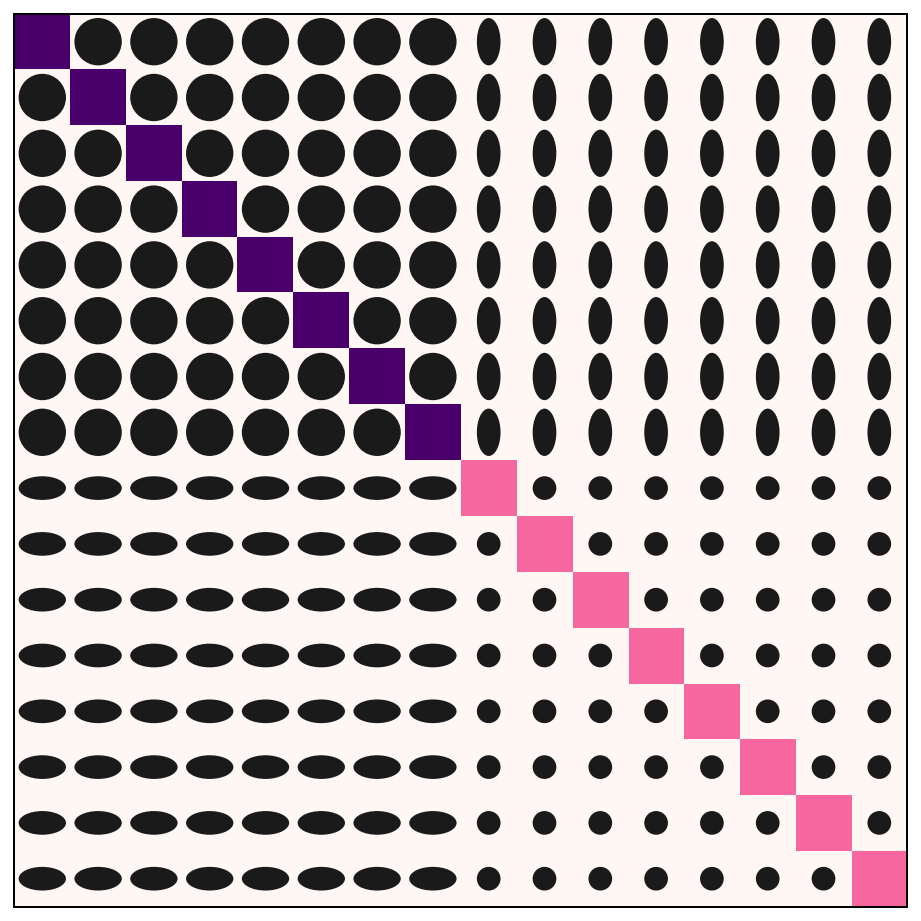

In [80]:
# Plot banded ridge
covplot(np.diag(8*[2] + 8*[0.5]), cmap=cm.RdPu, vmin=0, vmax=1)
xticks([])
yticks([]);

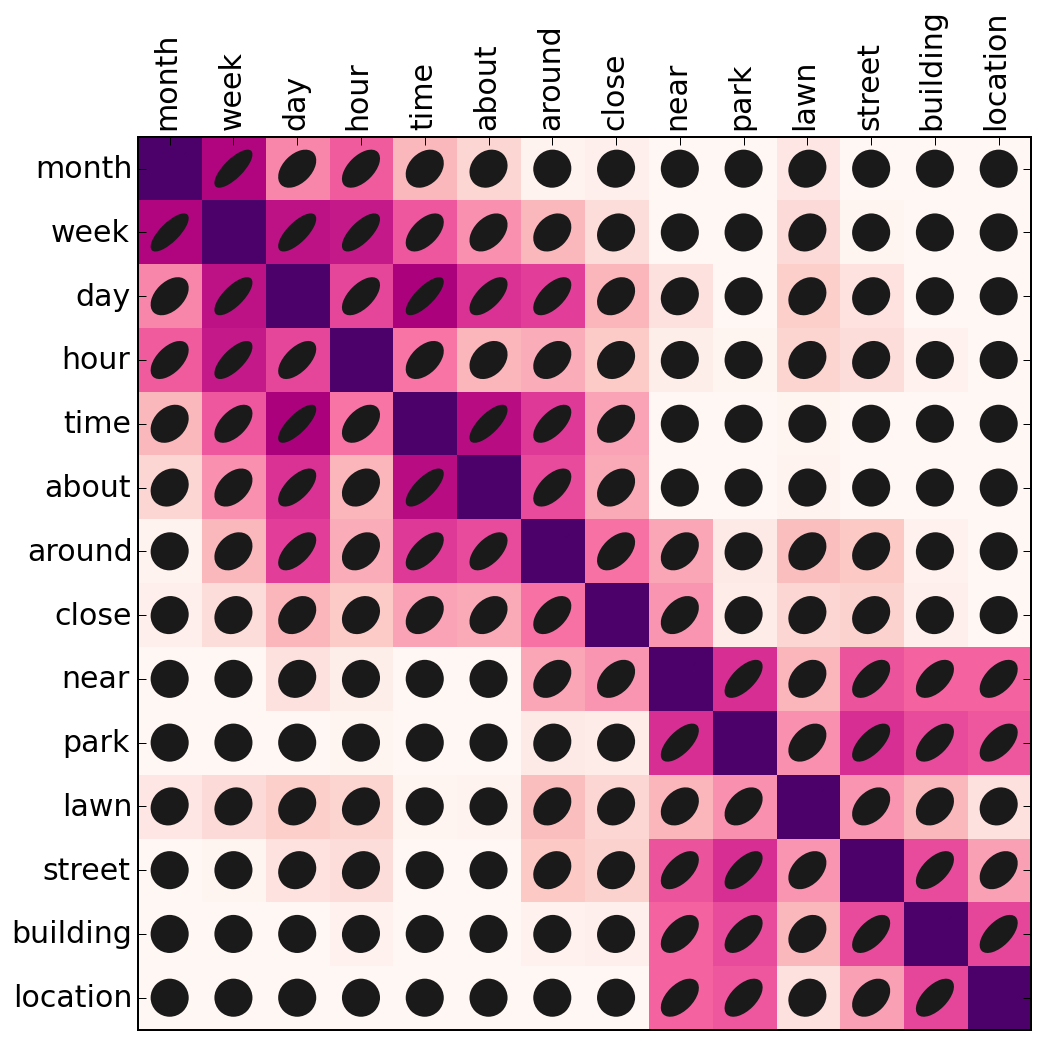

In [83]:
# Plot word embedding (positive only)
words = ['month', 'week', 'day', 'hour', 'time', 
         'about', 'around', 'close', 'near', 
         'park', 'lawn', 'street', 'building', 'location']

wordcov = [[0.99, 0.74, 0.43, 0.53, 0.29, 0.17, 0.02, 0.04, -0.15, -0.11, 0.09, -0.07, -0.09, -0.11], [0.74, 0.99, 0.71, 0.69, 0.54, 0.41, 0.29, 0.14, -0.11, -0.10, 0.15, 0.01, -0.13, -0.24], [0.43, 0.71, 0.99, 0.58, 0.75, 0.63, 0.60, 0.30, 0.12, -0.03, 0.20, 0.11, -0.12, -0.25], [0.53, 0.69, 0.58, 0.99, 0.47, 0.30, 0.33, 0.22, 0.05, 0.01, 0.18, 0.14, 0.03, -0.04], [0.29, 0.54, 0.75, 0.47, 0.99, 0.72, 0.61, 0.36, -0.02, -0.26, 0.01, -0.05, -0.20, -0.35], [0.17, 0.41, 0.63, 0.30, 0.72, 0.99, 0.57, 0.34, -0.11, -0.36, 0.02, -0.12, -0.35, -0.48], [0.02, 0.29, 0.60, 0.33, 0.61, 0.57, 0.99, 0.48, 0.35, 0.07, 0.27, 0.23, 0.03, -0.14], [0.04, 0.14, 0.30, 0.22, 0.36, 0.34, 0.48, 0.99, 0.40, 0.06, 0.17, 0.19, 0.04, -0.01], [-0.15, -0.11, 0.12, 0.05, -0.02, -0.11, 0.35, 0.40, 0.99, 0.64, 0.30, 0.55, 0.51, 0.51], [-0.11, -0.10, -0.03, 0.01, -0.26, -0.36, 0.07, 0.06, 0.64, 0.99, 0.41, 0.64, 0.57, 0.54], [0.09, 0.15, 0.20, 0.18, 0.01, 0.02, 0.27, 0.17, 0.30, 0.41, 0.99, 0.40, 0.29, 0.12], [-0.07, 0.01, 0.11, 0.14, -0.05, -0.12, 0.23, 0.19, 0.55, 0.64, 0.40, 0.99, 0.57, 0.37], [-0.09, -0.13, -0.12, 0.03, -0.20, -0.35, 0.03, 0.04, 0.51, 0.57, 0.29, 0.57, 0.99, 0.58], [-0.11, -0.24, -0.25, -0.04, -0.35, -0.48, -0.14, -0.01, 0.51, 0.54, 0.12, 0.37, 0.58, 0.99]]

#covplot(np.array(wordcov))
covplot(np.clip(np.array(wordcov), 0, np.inf), cmap=cm.RdPu, vmin=0)

gca().xaxis.tick_top()
xticks(range(len(words)), words, fontsize=15, rotation=90)
yticks(range(len(words)), words, fontsize=15);

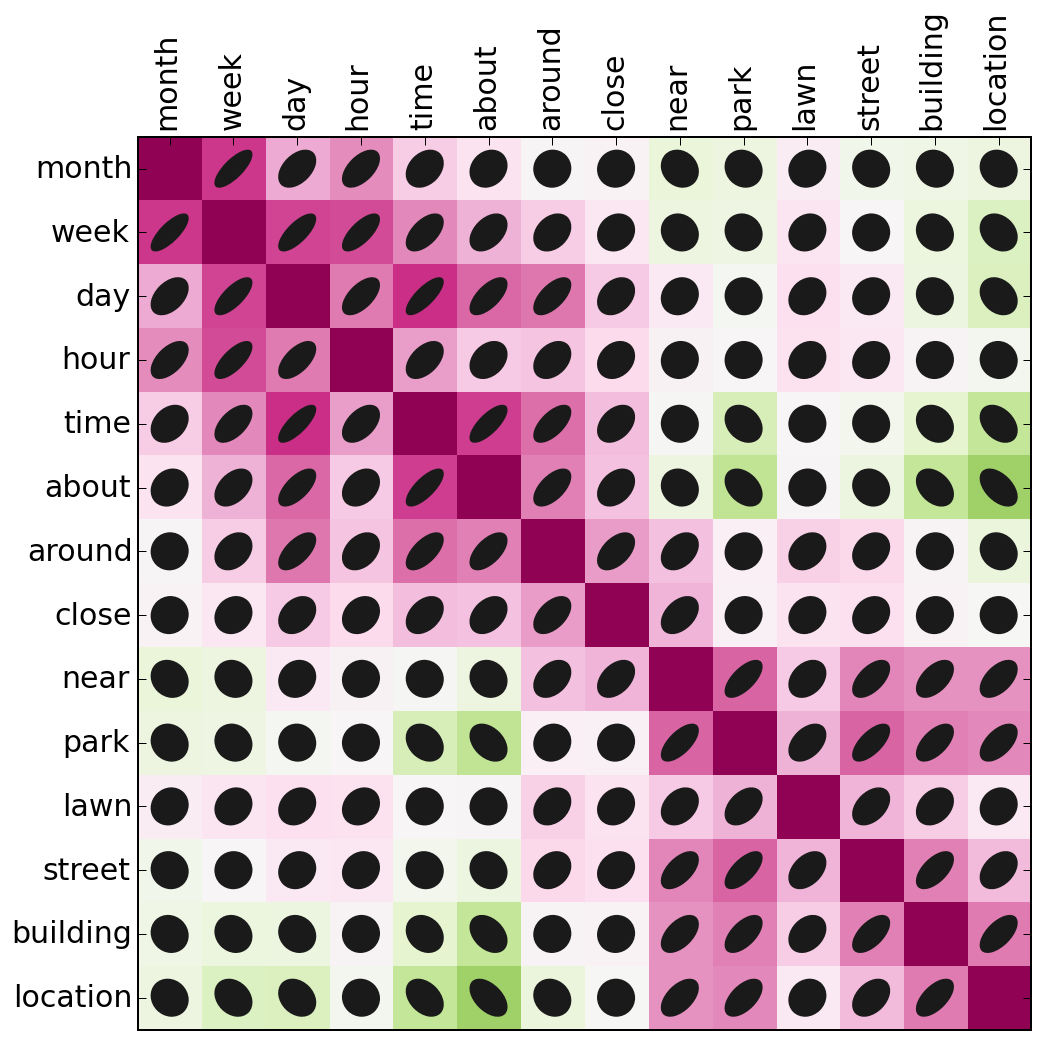

In [84]:
# Plot word embedding (positive and negative)
covplot(np.array(wordcov))

gca().xaxis.tick_top()
xticks(range(len(words)), words, fontsize=15, rotation=90)
yticks(range(len(words)), words, fontsize=15);

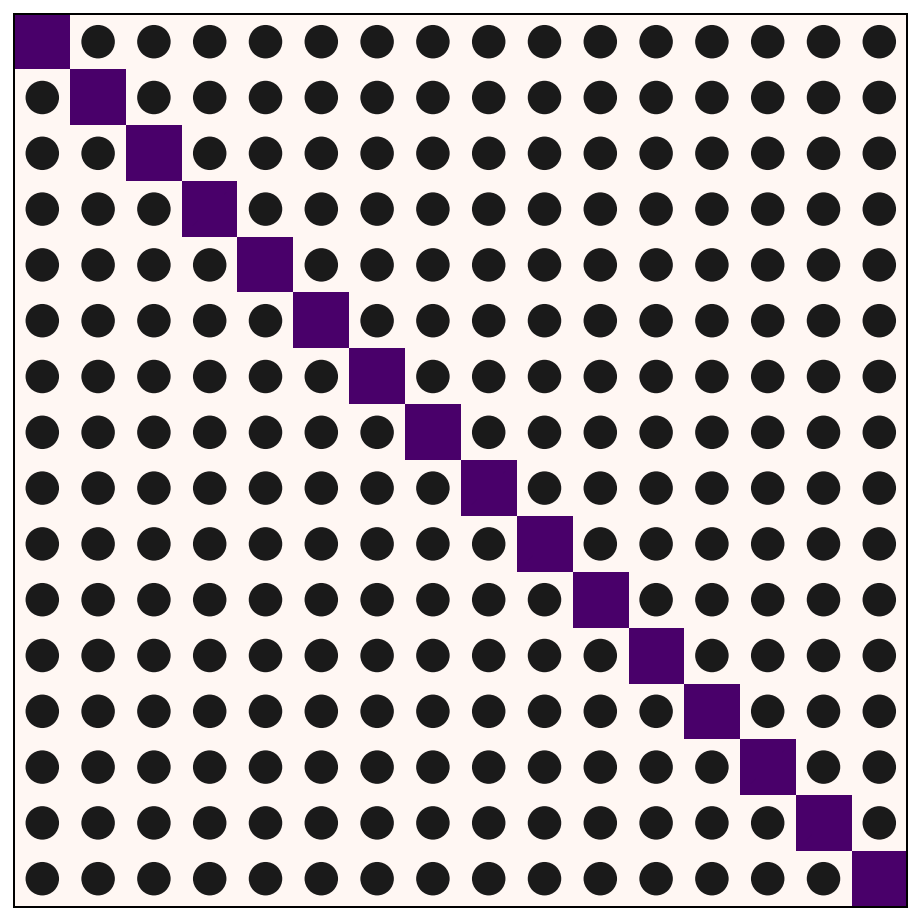

In [55]:
# Plot identity
covplot(np.eye(16), cmap=cm.RdPu, vmin=0)
xticks([])
yticks([]);

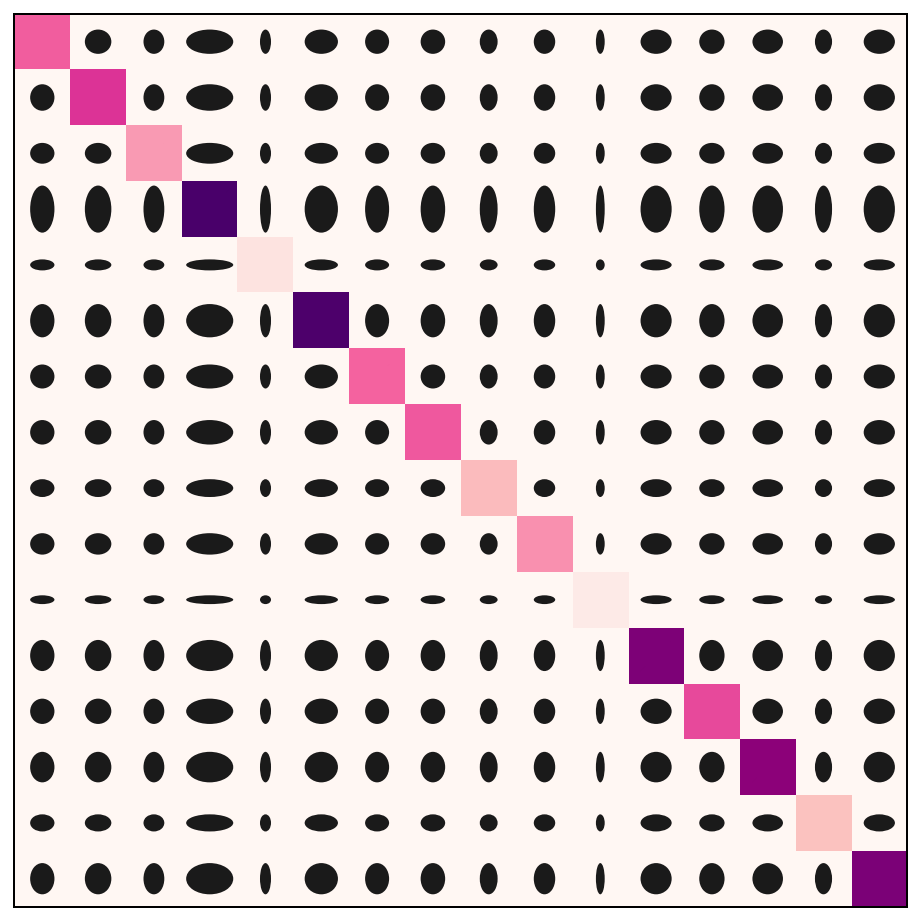

In [74]:
# Plot random diagonal
covplot(np.diag(np.random.rand(16) * 2), cmap=cm.RdPu, vmin=0)
xticks([])
yticks([]);